## Loading and Visualizing Stellar Catalog

In [4]:
%matplotlib inline

Tools used:

1. pandas

In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

matplotlib.style.use('ggplot')

from scipy.spatial.distance import pdist, squareform

I have downloaded the coordinate for stars from [this post](http://allthingsgraphed.com/2014/12/05/stellar-navigation-using-network-analysis/#data).

Using pandas I can load the data into DataFrame.

In [6]:
stars=pd.read_csv('assets/stars.csv')

I need to know what unit they are using. So I sort the data frame according to distance. The result shows that GI551, which is proxima centari, is 4.226 distance away from Sun. Then I know the unit is lightyear.

In [7]:
stars.sort_values('dist', ascending=True)

#Name    x-pos    y-pos    z-pos     dist             bright  \
0           Sun   0.0000   0.0000   0.0000   0.0000             1.0000   
78       Gl-551   2.9331  -3.0390   0.1443   4.2260             0.0001   
97      Gl-559A   3.1203  -3.0371   0.0539   4.3547             1.5417   
96      Gl-559B   3.1203  -3.0371   0.0539   4.3547             0.4529   
1078     Gl-699   4.9811   2.9792  -1.4457   5.9814             0.0004   
1141     Gl-406  -1.8978  -3.9022  -6.4784   7.7974             0.0000   
1722     Gl-411  -3.4014  -0.2952  -7.4659   8.2095             0.0056   
636      Gl-65A  -2.1037   0.1698   8.3034   8.5675             0.0001   
657     Gl-244A  -5.7538  -6.2178   1.3229   8.5742  40.179110125.2372   
656     Gl-244B  -5.7538  -6.2178   1.3229   8.5742   0.004710515.5618   
538      Gl-729   9.2261   1.8447   1.7060   9.5621             0.0005   
1848     Gl-905  -3.3808   9.2913   3.0079  10.3347             0.0001   
783      Gl-144  -6.8644  -1.9495   7.9366  10.6729             0.2992   
1000     Gl-447   0.0114  -5.4862  -9.3403  10.8324             0.0003   
677    Gl-866AB   4.1214   4.4179   9.2910  11.0827             0.0001   
1845     Gl-15A  -4.7911   9.5535   3.5650  11.2664             0.0061   
1844     Gl-15B  -4.7911   9.5535   3.5650  11.2664             0.0004   
138      Gl-845   6.9145  -3.0387   8.3915  11.2898             0.1393   
1761    Gl-820B   1.5163  11.1369   1.1435  11.2977             0.0406   
1762    Gl-820A   1.5163  11.1369   1.1435  11.2977             0.0863   
2058    Gl-725B   0.1340  10.3970  -4.6746  11.4003             0.0014   
2059    Gl-725A   0.1331  10.3968  -4.6752  11.4003             0.0029   
670       Gl-71  -3.2294   0.3855  10.9307  11.4043             0.4285   
1098    Gl-280A  -9.2506  -6.1678  -2.5739  11.4123             9.1201   
384      Gl-887   4.6728   0.4180  10.4694  11.4725             0.0125   
1531    GJ-1111  -9.5442  -2.9197  -6.3435  11.8261             0.0000   
649     Gl-54.1  -2.0489   1.1998  11.9643  12.1976             0.0002   
1101     Gl-273 -10.2568  -6.4828  -2.2245  12.3360             0.0014   
344      Gl-825   9.0054   0.6184   8.8091  12.6127             0.0281   
275      Gl-191  -3.4188  -9.6146   7.4378  12.6273             0.0038   
...         ...      ...      ...      ...      ...                ...   
723    Gl-57.1A -18.0195   9.5657  71.2654  74.1280             0.3251   
776     NN-4155  52.3717  38.3494  35.7980  74.1280             0.0075   
755     NN-3688   7.7819 -48.3505 -55.6474  74.1280             0.0031   
883    Gl-423.1  -4.5105 -46.7111 -57.3820  74.1280             0.5445   
1282    NN-3161 -51.0827  22.4460  48.8026  74.1280             1.9055   
746    Wo-9390A  13.9589 -45.8601 -56.5417  74.1280             0.8472   
360     NN-3446 -24.4959 -69.0025  11.5572  74.1280             0.9908   
1506    NN-3930  36.7886  32.9006 -55.3093  74.1280             0.2089   
1155    NN-3007 -11.2621  42.8256  59.4483  74.1280             0.0027   
1799    Wo-9393 -18.1594   9.9676 -71.1748  74.1280             0.0242   
2069  Gl-431.1A -33.2849  29.0345 -59.7423  74.2969             2.5823   
1978    NN-3569 -47.5641  15.3283 -54.9793  74.2969             0.0006   
1675  Gl-765.4A  27.0091  68.9644  -5.8695  74.2969             0.2070   
472     NN-3067  -0.4559  -1.8632  74.2721  74.2969             0.0182   
1526    NN-4047  41.4908  57.0309 -23.9009  74.4665             0.0661   
2028    Wo-9706  -5.6841  73.3182 -11.7218  74.4665             7.7268   
389     Wo-9787  37.3279   5.5550  64.1953  74.4665             0.3467   
1755    GJ-1249  19.4358  71.7297  -4.7282  74.4665             1.5417   
1515   Gl-157.1 -68.2516  15.2547  25.5787  74.4665             0.0041   
62     Gl-154.2   8.6872 -53.4020  51.4143  74.6369            12.5893   
1126  Gl-310.1B -51.9560 -42.2468 -32.9614  74.6369             0.5754   
1125  Gl-310.1A -51.9542 -42.2504 -32.9595  74.6369             2.0324   
1646    Wo-925

To have a sense of the distribution, we can plot some histograms.

But I need to select the distance col first.

In [8]:
stars['dist'].sort_values()

0        0.0000
78       4.2260
97       4.3547
96       4.3547
1078     5.9814
1141     7.7974
1722     8.2095
636      8.5675
657      8.5742
656      8.5742
538      9.5621
1848    10.3347
783     10.6729
1000    10.8324
677     11.0827
1845    11.2664
1844    11.2664
138     11.2898
1761    11.2977
1762    11.2977
2058    11.4003
2059    11.4003
670     11.4043
1098    11.4123
384     11.4725
1531    11.8261
649     12.1976
1101    12.3360
344     12.6127
275     12.6273
         ...   
723     74.1280
776     74.1280
755     74.1280
883     74.1280
1282    74.1280
746     74.1280
360     74.1280
1506    74.1280
1155    74.1280
1799    74.1280
2069    74.2969
1978    74.2969
1675    74.2969
472     74.2969
1526    74.4665
2028    74.4665
389     74.4665
1755    74.4665
1515    74.4665
62      74.6369
1126    74.6369
1125    74.6369
1646    74.6369
640     74.6369
1176    74.8081
675     74.8081
1453    74.9801
1934    74.9801
1933    74.9801
210     74.9801
Name: dist, dtype: float

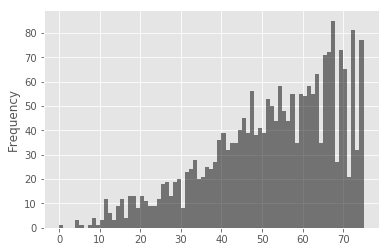

In [9]:
plt.figure();

plotstarshist=stars['dist'].plot.hist(color='k', alpha=0.5, bins=75, range=[0, 75])

which is an expected histogram in general since the differential volume for larger distances becomes larger.

I could also calculate the relative distances between each other.

I can either write a function that calculates the distances or use the pdist function in scipy.

In [24]:
dist_mat = pd.DataFrame( \
                        pd.DataFrame( \
                                     squareform( \
                                                pdist(stars[['x-pos','y-pos','z-pos']].values, metric='euclidean') \
                                               ) \
                                    ).values.flatten() \
                       )

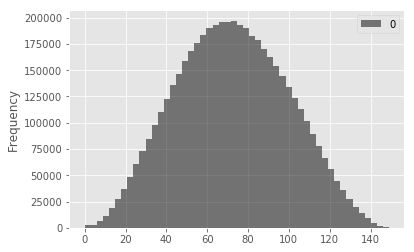

In [27]:
dist_mat.plot.hist(color='k', alpha=0.5, bins=50)

So the stars seems to be quite homogeneous.